# **Ecuaciones Diferenciales con Transformada de Laplace. Aplicacion a un resorte**

In [2]:
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import symbols, laplace_transform
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [4]:
import sympy
sympy.init_printing()

In [5]:
from scipy import integrate

Ejemplo. Consideremos la siguiente ecuación con condiciones iniciales:
$$m\frac{d^2x}{dt^2}+kx=P_0\delta(t-t_o) $$
$$x(0)=0 , x'(0)=0 $$

In [6]:
t = sympy.symbols("t", positive=True) #Definimos cada una de las varaibles como terminos algebraicos haciendo que t sea un numero positivo

In [7]:
s, X = sympy.symbols("s X", complex=True) #hacemos que s & X sean valores reales

In [9]:
x = sympy.Function("x") #Hacemos que "x" sea una función en terminos de las anteriores variables
m,k,P_o,t_o = sympy.symbols("m,k,P_o,t_o", real=True)
#Definimos alguno valores para visaulziar la gráfica
m=1
k=1
P_o=10

In [10]:
delta=sympy.DiracDelta(t-1)

In [11]:
ode =m*x(t).diff(t, 2) + k*x(t)- P_o*delta #Comando para ED

In [12]:
ode

                       2      
                      d       
x(t) - 10⋅δ(t - 1) + ───(x(t))
                       2      
                     dt       

In [13]:
L_x = sympy.laplace_transform(x(t), t, s) #Aplicamos su transformada de Laplace

In [14]:
L_x

(LaplaceTransform(x(t), t, s), -∞, True)

In [17]:
L_ode= sympy.laplace_transform(ode, t, s)

In [19]:
L_ode #Expresin en forma algebraica de la transformada de Laplace

⎛ 2                                                                        ⎛d 
⎜s ⋅LaplaceTransform(x(t), t, s) - s⋅x(0) + LaplaceTransform(x(t), t, s) - ⎜──
⎝                                                                          ⎝dt

      ⎞│          -s          ⎞
(x(t))⎟│    - 10⋅ℯ  , -∞, True⎟
      ⎠│t=0                   ⎠

In [20]:
def laplace_transform_derivatives(e):
    """
    Evaluate the laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

In [21]:
L_ode

⎛ 2                                                                        ⎛d 
⎜s ⋅LaplaceTransform(x(t), t, s) - s⋅x(0) + LaplaceTransform(x(t), t, s) - ⎜──
⎝                                                                          ⎝dt

      ⎞│          -s          ⎞
(x(t))⎟│    - 10⋅ℯ  , -∞, True⎟
      ⎠│t=0                   ⎠

In [22]:
# Obtener la expresión de la transformada de Laplace (el primer elemento del resultado)
L_x_expr = L_x[0]  # El primer elemento de la tupla devuelta por LaplaceTransform

# Ahora sustituimos L_x_expr por X en la ecuación
L_ode_3 = L_ode[0].subs(L_x_expr, X)

In [23]:
L_ode_3

   2                ⎛d       ⎞│          -s
X⋅s  + X - s⋅x(0) - ⎜──(x(t))⎟│    - 10⋅ℯ  
                    ⎝dt      ⎠│t=0         

In [24]:
ics = {x(0): 0, x(t).diff(t).subs(t, 0): 0} #COmando para agregar condiciiones iniciales

In [25]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 0, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [26]:
L_ode_4 = L_ode_3.subs(ics) #Sustituye los valores iniciales en la ED L_ode_3

In [27]:
L_ode_4

   2           -s
X⋅s  + X - 10⋅ℯ  

In [28]:
X_sol = sympy.solve(L_ode_4,X)

In [29]:
X_sol #Muesta la solución a la ED, sin embargo cuando aparece un cuadrito significa que la ED no tiene solución por este metodo

⎡    -s⎤
⎢10⋅ℯ  ⎥
⎢──────⎥
⎢ 2    ⎥
⎣s  + 1⎦

In [30]:
x_sol = sympy.inverse_laplace_transform(X_sol[0], s, t)

In [31]:
x_sol

10⋅sin(t - 1)⋅θ(t - 1)

In [32]:
x_t = sympy.lambdify(t, x_sol.evalf(), 'numpy')

In [33]:
x_t

<function _lambdifygenerated(t)>

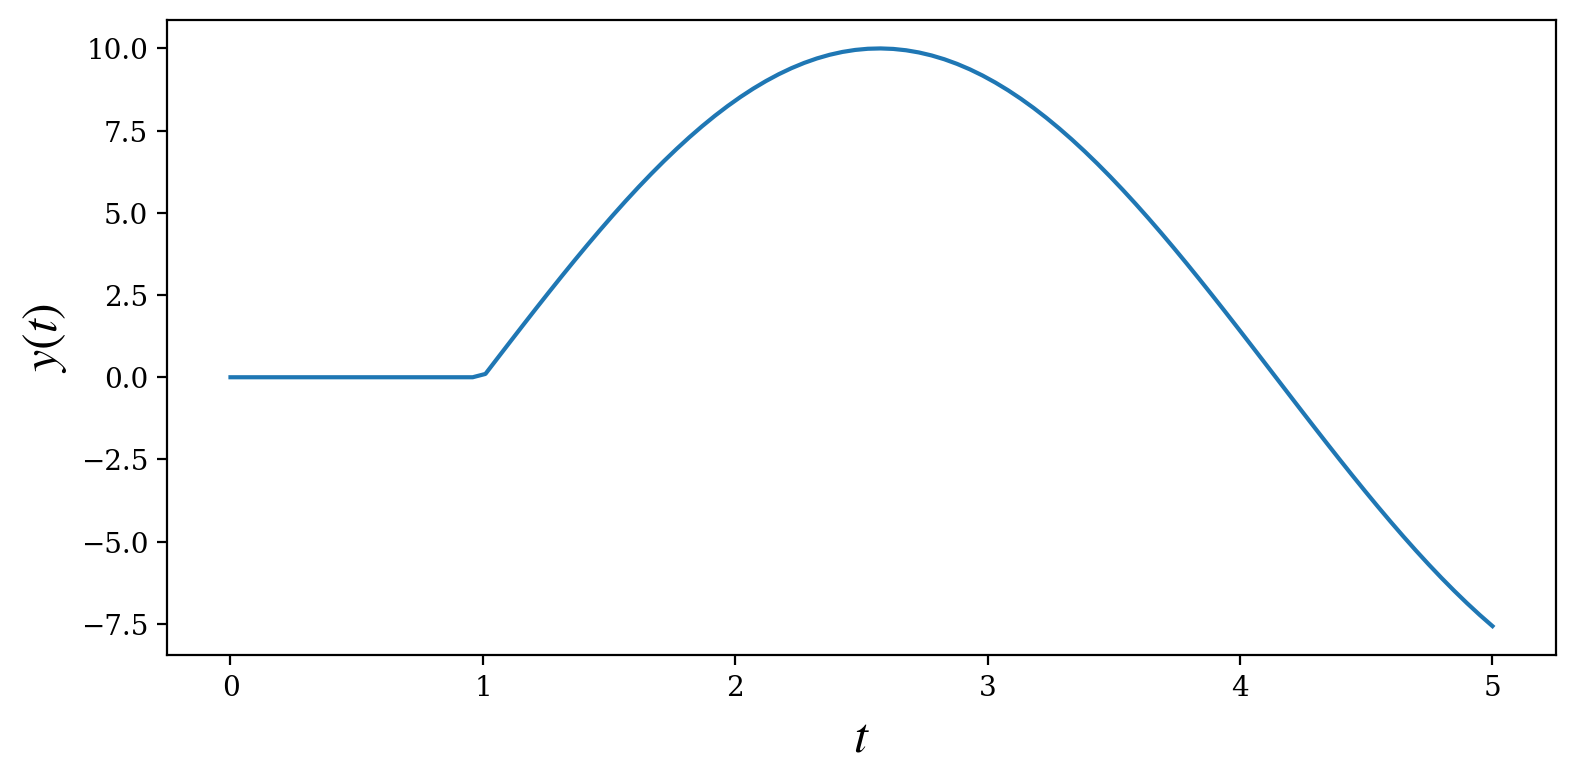

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("text", usetex=False)  # Desactiva el uso de LaTeX

fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 5, 100)
ax.plot(tt, x_t(tt).real)
ax.set_xlabel(r"$t$", fontsize=18)  # Todavía puedes usar texto matemático, pero sin LaTeX
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()
plt.show()


### **Aplicación para un circuito Eléctrico**

Considere el siguiente circuito eléctrico:

<div style="text-align: center;">
<img src="Images/cto.png" width="250" style="display:inline;">
</div>

Encontrar el valor de la carga $Q(t)$ en cualquier tiempo $t$ del circuito si $E(t)$ es una función del tiempo dada por la expresión:
$$
E(t) = 
\begin{cases} 
E_0, & 0 \leq t < T \\
0, & t > T 
\end{cases}
$$
Donde $Q(0)=0$

La ecuación diferencial que rige a este circuito es:
$$R\frac{dQ}{dt} + \frac{Q}{C}= E(t) $$
Donde $E(t)$ puede ser expresado en términos de la función de Heaviside $E_0[1-\theta(t-1)]$ 
$$R\frac{dQ}{dt} + \frac{Q}{C}= E_0[1-\theta(t-1)] $$

In [82]:
import numpy as np
import sympy
sympy.init_printing()
from scipy import integrate

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import symbols, laplace_transform
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'


In [83]:
t = sympy.symbols("t", positive=True) #Definimos cada una de las varaibles como terminos algebraicos haciendo que t sea un numero positivo

In [84]:
s, Q = sympy.symbols("s Q", complex=True) #hacemos que s & X sean valores reales

In [120]:
q = sympy.Function("q") #Hacemos que "q" sea una función en terminos de las anteriores variables
R,C,E_o= sympy.symbols("R,C,E_o", real=True)
#Definimos alguno valores para visaulziar la gráfica
R=100 #ohms
C=0.000010 #
E_o=12

In [121]:
Escalon=E_o-E_o*sympy.Heaviside(t-1)

In [122]:
Escalon

12 - 12⋅θ(t - 1)

In [123]:
ode =R*q(t).diff(t, 2) + q(t)/C-Escalon #Comando para ED

In [124]:
ode

                                    2           
                                   d            
100000.0⋅q(t) + 12⋅θ(t - 1) + 100⋅───(q(t)) - 12
                                    2           
                                  dt            

In [125]:
L_q = sympy.laplace_transform(q(t), t, s) #Aplicamos su transformada de Laplace


In [126]:
L_q

(LaplaceTransform(q(t), t, s), -∞, True)

In [127]:
L_ode= sympy.laplace_transform(ode, t, s)

In [128]:
L_ode

⎛                                                                             
⎜     2                                                                       
⎜100⋅s ⋅LaplaceTransform(q(t), t, s) - 100⋅s⋅q(0) + 100000.0⋅LaplaceTransform(
⎝                                                                             

                                            -s         ⎞
                  ⎛d       ⎞│      12   12⋅ℯ           ⎟
q(t), t, s) - 100⋅⎜──(q(t))⎟│    - ── + ──────, 0, True⎟
                  ⎝dt      ⎠│t=0   s      s            ⎠

In [129]:
def laplace_transform_derivatives(e):
    """
    Evaluate the laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

In [130]:
# Obtener la expresión de la transformada de Laplace (el primer elemento del resultado)
L_q_expr = L_q[0]  # El primer elemento de la tupla devuelta por LaplaceTransform

# Ahora sustituimos L_q_expr por Q en la ecuación
L_ode_3 = L_ode[0].subs(L_q_expr, Q)

In [131]:
L_ode_3

                                                                   -s
       2                                 ⎛d       ⎞│      12   12⋅ℯ  
100⋅Q⋅s  + 100000.0⋅Q - 100⋅s⋅q(0) - 100⋅⎜──(q(t))⎟│    - ── + ──────
                                         ⎝dt      ⎠│t=0   s      s   

In [132]:
ics = {q(0): 0, q(t).diff(t).subs(t, 0): 0} #COmando para agregar condiciiones iniciales

In [133]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨q(0): 0, ⎜──(q(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [134]:
L_ode_4 = L_ode_3.subs(ics) #Sustituye los valores iniciales en la ED L_ode_3

In [135]:
L_ode_4

                                 -s
       2                12   12⋅ℯ  
100⋅Q⋅s  + 100000.0⋅Q - ── + ──────
                        s      s   

In [136]:
Q_sol = sympy.solve(L_ode_4,Q)

In [137]:
Q_sol #Muesta la solución a la ED, sin embargo cuando aparece un cuadrito significa que la ED no tiene solución por este metodo

⎡     ⎛     s      ⎞  -s⎤
⎢0.04⋅⎝3.0⋅ℯ  - 3.0⎠⋅ℯ  ⎥
⎢───────────────────────⎥
⎢      ⎛ 2         ⎞    ⎥
⎣    s⋅⎝s  + 1000.0⎠    ⎦

Ya que el resultado inverso de la transformada de Laplace es complejo para la maquina oeprarlo, escribimos nuevamente la solución inversa de la tranformada y esta le aplicamos la transformada

In [138]:
invers=(C*E_o)/(s*(C*R*s**2+1))-sympy.exp(-s)/(s*(C*R*s**2+1))

In [139]:
invers 

                          -s       
    0.00012              ℯ         
──────────────── - ────────────────
  ⎛       2    ⎞     ⎛       2    ⎞
s⋅⎝0.001⋅s  + 1⎠   s⋅⎝0.001⋅s  + 1⎠

In [140]:
q_sol = sympy.inverse_laplace_transform(invers, s, t)

In [141]:
q_sol

-(1 - cos(31.6227766016838⋅t - 31.6227766016838))⋅θ(t - 1) - 0.00012⋅cos(31.62
27766016838⋅t) + 0.00012

In [142]:
q_t = sympy.lambdify(t, q_sol.evalf(), 'numpy')

In [143]:
q_t

<function _lambdifygenerated(t)>

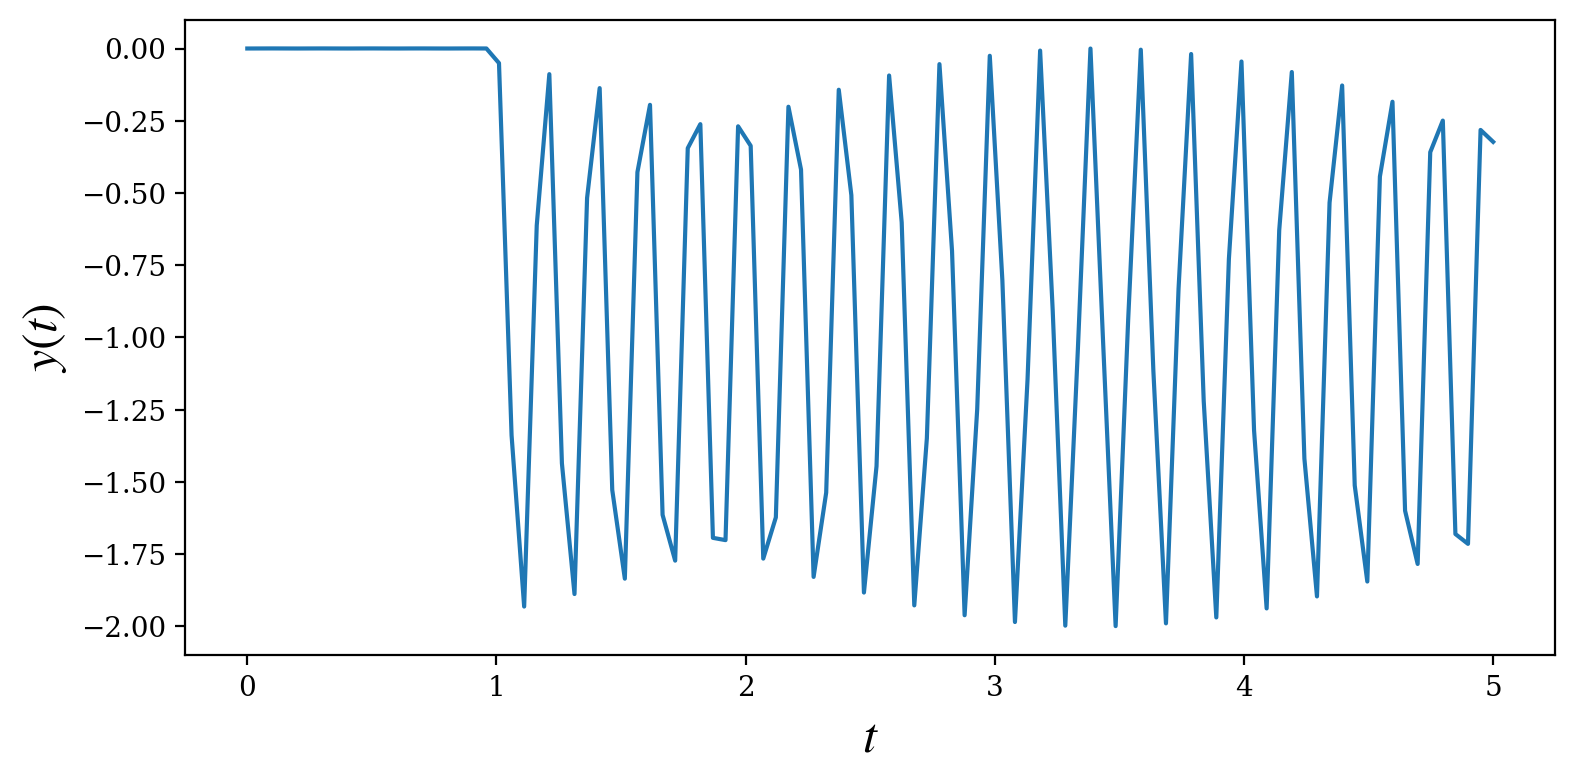

In [144]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("text", usetex=False)  # Desactiva el uso de LaTeX

fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 5, 100)
ax.plot(tt, q_t(tt).real)
ax.set_xlabel(r"$t$", fontsize=18)  # Todavía puedes usar texto matemático, pero sin LaTeX
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()
plt.show()
